In [24]:
from lib.analysis import *
import numpy as np

class Averaging():
    def __init__(self):
        self.x_values = []
        self.y_values = []
        self.min_x_key = None
        self.max_x_key = None

    def average(self, packages: list[RecordStepsPackage], precision=1000):
        positions = dict()

        for i, pack in enumerate(packages):
            # if not (name in pack.name): continue
            print(pack.name)
            for step in pack.steps:
                key = str(round(step.pos * precision) / precision)
                if not key in positions:
                    positions[key] = []
                positions[key].append(step.digital)

        for key in positions:
            positions[key] = np.average(positions[key])

        x_values = self.x_values
        y_values = self.y_values
        keys = sorted(positions.keys(), key=lambda x: float(x))
        print(keys)

        prev_pos = 0
        for key in keys:
            pos = float(key)
            value = positions[key]

            if self.min_x_key is None and value < 1:
                self.min_x_key = prev_pos

            prev_pos = pos

        prev_pos = 0
        for key in reversed(keys):
            pos = float(key)
            value = positions[key]
            
            if self.max_x_key is None and value > 0:
                self.max_x_key = prev_pos

            prev_pos = pos

        for key in reversed(keys):
            pos = float(key)
            x_values.append(pos)

            if pos > self.min_x_key and pos < self.max_x_key:
                y_values.append(np.random.randint(0, 2))
            else:
                value = positions[key]
                y_values.append(value)

        gap_poses = []
        gap_weights = []


3_1_pribl
3_2_pribl
3_3_pribl
['8.849', '8.859', '8.862', '8.863', '8.864', '8.865', '8.878', '8.879', '8.88', '8.881', '8.883', '8.884', '8.894', '8.895', '8.896', '8.897', '8.91', '8.911', '8.912', '8.913', '8.914', '8.926', '8.927', '8.928', '8.929', '8.93', '8.935', '8.939', '8.94', '8.941', '8.942', '8.943', '8.944', '8.945', '8.947', '8.958', '8.959', '8.96', '8.961', '8.962', '8.963', '8.966', '8.974', '8.975', '8.976', '8.977', '8.978', '8.979', '8.99', '8.991', '8.992', '8.993', '9.005', '9.006', '9.007', '9.008', '9.009', '9.022', '9.023', '9.024', '9.025', '9.031', '9.038', '9.039', '9.04', '9.041', '9.051', '9.054', '9.055', '9.056', '9.057', '9.064', '9.07', '9.071', '9.072', '9.073', '9.086', '9.087', '9.088', '9.089', '9.102', '9.103', '9.104', '9.105', '9.118', '9.119', '9.12', '9.121', '9.122', '9.134', '9.135', '9.136', '9.137', '9.15', '9.151', '9.152', '9.153', '9.166', '9.167', '9.168', '9.169', '9.171', '9.182', '9.183', '9.184', '9.185', '9.186', '9.188', '9.19',

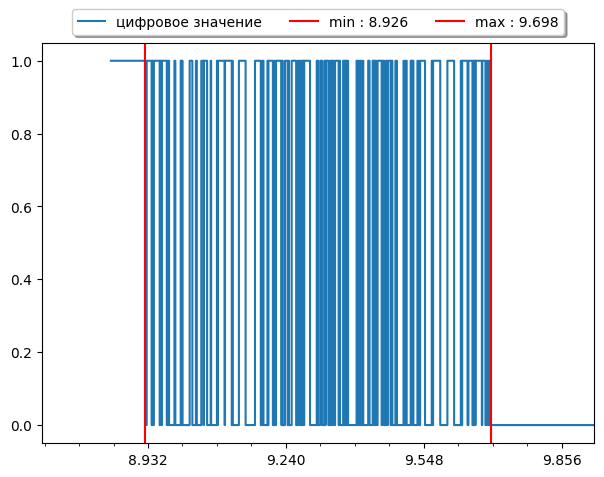

In [81]:
from lib.analysis import *
import matplotlib
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

reader = MultiReader(Path("./measurements/3stMagnet/"))
packages = reader.parse()

first_positive_digital_steps = []

name = "pribl"

packs = []
for pack in packages:
    if name in pack.name:
        packs.append(pack)

averaging = Averaging()
averaging.average(packs, 10000)
# averaging.y_values = np.round(averaging.y_values)

fig, ax1 = plt.subplots()
ax: Axes = ax1

ax.step(averaging.x_values, averaging.y_values, label="цифровое значение", where="post")
ax.axvline(averaging.min_x_key, color='red', linestyle='-', linewidth=1.5, label=f'min : {averaging.min_x_key:.3f}')
ax.axvline(averaging.max_x_key, color='red', linestyle='-', linewidth=1.5, label=f'max : {averaging.max_x_key:.3f}')

dist = averaging.max_x_key - averaging.min_x_key
ax1.set_xlim([averaging.min_x_key - dist*0.3, averaging.max_x_key + dist*0.3])

space = round(abs(dist) * 100) / 100
space = space * 0.4

ax.xaxis.set_major_locator(ticker.MultipleLocator(space))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(space / 4))

# Показываем график
fig.tight_layout(pad=2)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
save_file = reader.dir / "digital_graphs"
save_file.mkdir(exist_ok=True)
save_file = save_file/f"{name}.png"
plt.savefig(save_file, bbox_inches='tight')

# Старые

In [ ]:
from lib.analysis import *
import matplotlib
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from lib.analysis import *

reader = MultiReader(Path("./measurements/3stMnogokrat_Izm/"))
packages = reader.parse()

first_positive_digital_steps = []

for pack in packages:
    for step in pack.steps:
        if step.digital == 1:
            first_positive_digital_steps.append(step)
            break

# first_positive_digital_steps = sorted(first_positive_digital_steps, key=lambda x: x.pos)

text = ""
for step in first_positive_digital_steps:
    text += f"{step.pos}\n"

save_file = reader.dir / "digital_graphs"
save_file.mkdir(exist_ok=True)
save_file = save_file/f"first_positive.txt"
save_file.write_text(text, encoding="utf-8")
print(text)

9.601
9.681
9.665
9.665
9.664
9.712
9.696
9.742
9.71
9.696
9.728
9.649
9.728
9.713
9.758
9.742
9.726
9.729
9.761
9.744
9.697
9.745
9.697
9.726
9.665
9.745
9.698
9.697
9.662



3_10_S 9.601
3_11_S 9.681
3_12_S 9.665
3_13_S 9.665
3_14_S 9.664
3_15_S 9.712
3_16_S 9.696
3_17_S 9.742
3_18_S 9.71
3_19_S 9.696
3_20_S 9.728
3_21_S 9.649
3_22_S 9.728
3_23_S 9.713
3_24_S 9.758
3_25_S 9.742
3_26_S 9.726
3_27_S 9.729
3_28_S 9.761
3_29_S 9.744
3_2_S 9.697
3_30_S 9.745
3_3_S 9.697
3_4_S 9.726
3_5_S 9.665
3_6_S 9.745
3_7_S 9.698
3_8_S 9.697
3_9_S 9.662
9.602 [9.601]
9.606 []
9.608 []
9.61 []
9.612 []
9.614 []
9.616 []
9.618 []
9.62 []
9.622 []
9.624 []
9.626 []
9.628 []
9.63 []
9.632 []
9.634 []
9.636 []
9.638 []
9.64 []
9.642 []
9.644 []
9.646 []
9.648 []
9.65 [9.649]
9.652 []
9.654 []
9.656 []
9.658 []
9.66 []
9.662 [9.662]
9.664 [9.664]
9.666 [9.665, 9.665, 9.665]
9.668 []
9.67 []
9.672 []
9.674 []
9.676 []
9.678 []
9.68 []
9.682 [9.681]
9.684 []
9.686 []
9.688 []
9.69 []
9.692 []
9.694 []
9.696 [9.696, 9.696]
9.698 [9.697, 9.697, 9.698, 9.697]
9.7 []
9.702 []
9.704 []
9.706 []
9.708 []
9.71 [9.71]
9.712 [9.712]
9.714 [9.713]
9.716 []
9.718 []
9.72 []
9.722 []
9.724 []


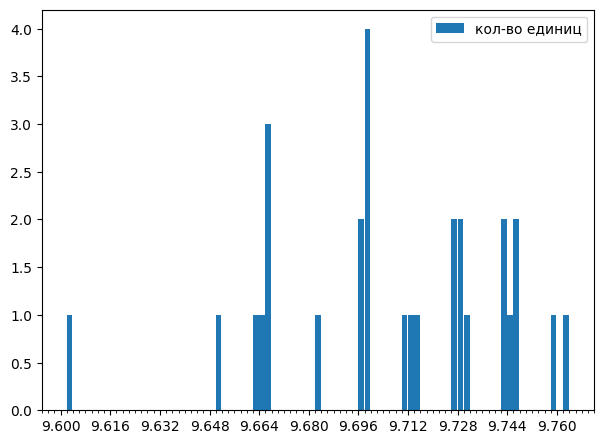

In [9]:
from lib.analysis import *
import matplotlib
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from lib.analysis import *

reader = MultiReader(Path("./measurements/3stMnogokrat_Izm/"))
packages = reader.parse()

first_positive_digital_steps = []

for pack in packages:
    for step in pack.steps:
        if step.digital == 1:
            first_positive_digital_steps.append(step)
            print(pack.name, step.pos)
            break

precision = 500

positions = dict()
for step in first_positive_digital_steps:
    key = str(np.ceil(step.pos * precision) / precision)
    if not key in positions:
        positions[key] = []
    positions[key].append(step.pos)

keys = sorted(positions.keys(), key=lambda x: float(x))

for new_key in np.arange(float(keys[0]), float(keys[-1]), 1 / precision):
    new_key = str(np.ceil(new_key * precision) / precision)
    if not new_key in positions:
        positions[new_key] = []

keys = sorted(positions.keys(), key=lambda x: float(x))

fig, ax1 = plt.subplots()
ax: Axes = ax1

space = (2 / precision)
ax.xaxis.set_major_locator(ticker.MultipleLocator(space * 4))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(space / 2))

counts = []
bins = []
for key in keys:
    print(key, positions[key])
    counts.append(len(positions[key]))
    bins.append(float(key))

print(len(positions))

ax.hist(bins, bins, weights=counts, label="кол-во единиц", width= (1 / precision / 1.1))

fig.tight_layout(pad=2)

plt.legend()
save_file = reader.dir / "digital_graphs"
save_file.mkdir(exist_ok=True)
save_file = save_file/f"{reader.dir.stem}.png"
plt.savefig(save_file, bbox_inches='tight')

In [ ]:
[ step.pos for step in first_positive_digital_steps ]

[4.093,
 4.084,
 4.095,
 4.063,
 4.093,
 4.061,
 4.09,
 4.046,
 4.08,
 4.066,
 4.063,
 4.094,
 4.08,
 4.08,
 4.08,
 4.093,
 4.096,
 4.064,
 4.077,
 4.077,
 4.093,
 4.094,
 4.064,
 4.081,
 4.084,
 4.093,
 4.079,
 4.077,
 4.078,
 4.079]

# Усреднение

In [ ]:


positions

1_1_otdal
1_2_otdal
1_3_otdal


{'3.727': 1.0,
 '3.728': 1.0,
 '3.741': 1.0,
 '3.742': 1.0,
 '3.743': 1.0,
 '3.744': 1.0,
 '3.757': 1.0,
 '3.758': 1.0,
 '3.759': 1.0,
 '3.76': 1.0,
 '3.773': 1.0,
 '3.774': 1.0,
 '3.775': 1.0,
 '3.776': 1.0,
 '3.789': 1.0,
 '3.79': 1.0,
 '3.791': 1.0,
 '3.792': 1.0,
 '3.805': 1.0,
 '3.806': 1.0,
 '3.807': 1.0,
 '3.808': 1.0,
 '3.821': 1.0,
 '3.822': 1.0,
 '3.823': 1.0,
 '3.824': 1.0,
 '3.825': 1.0,
 '3.837': 1.0,
 '3.838': 1.0,
 '3.839': 1.0,
 '3.84': 1.0,
 '3.853': 1.0,
 '3.854': 1.0,
 '3.855': 1.0,
 '3.856': 1.0,
 '3.869': 1.0,
 '3.87': 1.0,
 '3.871': 1.0,
 '3.872': 1.0,
 '3.885': 1.0,
 '3.886': 1.0,
 '3.887': 1.0,
 '3.888': 1.0,
 '3.901': 1.0,
 '3.902': 1.0,
 '3.903': 1.0,
 '3.904': 1.0,
 '3.917': 1.0,
 '3.918': 1.0,
 '3.919': 1.0,
 '3.92': 1.0,
 '3.933': 1.0,
 '3.934': 1.0,
 '3.935': 1.0,
 '3.936': 1.0,
 '3.949': 1.0,
 '3.95': 1.0,
 '3.951': 1.0,
 '3.952': 1.0,
 '3.965': 1.0,
 '3.966': 1.0,
 '3.967': 1.0,
 '3.968': 1.0,
 '3.981': 1.0,
 '3.982': 1.0,
 '3.983': 1.0,
 '3.984': 1.0,
 

1_10_S
1_11_S
1_12_S
1_13_S
1_14_S
1_15_S
1_16_S
1_17_S
1_18_S
1_19_S
1_1_S
1_20_S
1_21_S
1_22_S
1_23_S
1_24_S
1_25_S
1_26_S
1_27_S
1_28_S
1_29_S
1_2_S
1_30_S
1_3_S
1_4_S
1_5_S
1_6_S
1_7_S
1_8_S
1_9_S
['4.016', '4.029', '4.03', '4.031', '4.032', '4.033', '4.035', '4.036', '4.037', '4.038', '4.039', '4.04', '4.041', '4.042', '4.043', '4.044', '4.045', '4.046', '4.047', '4.048', '4.049', '4.05', '4.051', '4.052', '4.053', '4.054', '4.055', '4.056', '4.057', '4.058', '4.059', '4.06', '4.061', '4.062', '4.063', '4.064', '4.065', '4.066', '4.067', '4.068', '4.069', '4.07', '4.071', '4.072', '4.073', '4.074', '4.075', '4.076', '4.077', '4.078', '4.079', '4.08', '4.081', '4.082', '4.083', '4.084', '4.085', '4.086', '4.087', '4.088', '4.089', '4.09', '4.091', '4.092', '4.093', '4.094', '4.095', '4.096', '4.097', '4.098', '4.099', '4.1', '4.101', '4.102', '4.103', '4.105', '4.106', '4.107', '4.108', '4.109', '4.11', '4.111', '4.112', '4.113', '4.114', '4.115', '4.116', '4.117', '4.118', '4.119'

Locator attempting to generate 1103 ticks ([-0.505, ..., 5.005]), which exceeds Locator.MAXTICKS (1000).


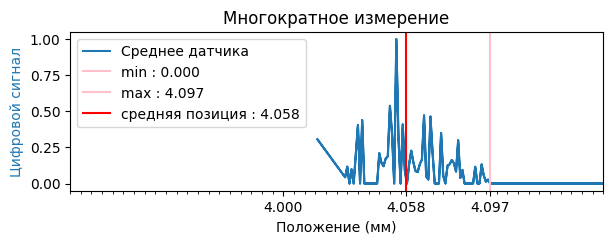

In [14]:
from lib.analysis import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

reader = MultiReader(Path("./measurements/1stMnogokrant_Izm/"))
packages = reader.parse()

positions = dict()

precision = 1000
name = "multiple"

for i, pack in enumerate(packages):
    # if not (name in pack.name): continue
    print(pack.name)
    for step in pack.steps:
        key = str(round(step.pos * precision) / precision)
        if not key in positions:
            positions[key] = []
        positions[key].append(step.digital)

for key in positions:
    positions[key] = np.average(positions[key])

fig, ax1 = plt.subplots()
# График положения
ax1.set_xlabel("Положение (мм)")
ax1.set_ylabel("Цифровой сигнал", color="tab:blue")

ax1.tick_params(axis="y")

space = 0.1
ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.005))

x_values = []
y_values = []
keys = sorted(positions.keys(), key=lambda x: float(x))
print(keys)

min_x_key = None
max_y_key = None

prev_pos = 0
for key in keys:
    pos = float(key)
    x_values.append(pos)
    value = positions[key]
    y_values.append(value)

    if min_x_key is None and value < 1:
        min_x_key = prev_pos

    prev_pos = pos

prev_pos = 0
for key in reversed(keys):
    pos = float(key)
    x_values.append(pos)
    value = positions[key]
    y_values.append(value)
    
    if max_y_key is None and value > 0:
        max_y_key = prev_pos

    prev_pos = pos

gap_poses = []
gap_weights = []

for key in keys:
    pos = float(key)
    if pos > min_x_key and pos < max_y_key:
        value = positions[str(key)]
        gap_poses.append(pos)
        gap_weights.append(value)

average_pos = np.average(gap_poses, weights=gap_weights)

ax1.plot(x_values, y_values, label="Среднее датчика", color="tab:blue")

ax1.axvline(min_x_key, color='pink', linestyle='-', linewidth=1.5, label=f'min : {min_x_key:.3f}')
ax1.axvline(max_y_key, color='pink', linestyle='-', linewidth=1.5, label=f'max : {max_y_key:.3f}')
ax1.axvline(average_pos, color='red', linestyle='-', linewidth=1.5, label=f'средняя позиция : {average_pos:.3f}')
# ax1.axvline(mean_x, color='red', linestyle='-', linewidth=3, label=f'Среднее позиции: {mean_x:.2f}')

# print(plt.xticks()[0])
plt.xticks(list(plt.xticks()[0]) + [min_x_key, max_y_key, average_pos])

ax1.set_xlim([3.9, 4.15])

# Показываем график
fig.tight_layout(pad=2)

fig.set_figheight(2)

ax1.legend()
name_map = {
    "otdal": "Отдаление",
    "pribl": "Приближение",
    "multiple": "Многократное измерение"
}

plt.title(name_map[name])

save_file = reader.dir / "digital_graphs"
save_file.mkdir(exist_ok=True)
save_file = save_file/f"{reader.dir.stem}.png"
plt.savefig(save_file, bbox_inches='tight')

In [ ]:
fig, ax1 = plt.subplots()

def get_cmap(n, name='hsv'):
    return plt.colormaps.get_cmap(name)(n)

# График положения
ax1.set_xlabel("Положение (мм)")
ax1.set_ylabel("Цифровой сигнал", color="tab:blue")

ax1.tick_params(axis="y")
ax1.set_xlim([3, 5])

space = 0.25
ax1.xaxis.set_major_locator(ticker.MultipleLocator(space))

# Вторая ось для аналогового значения
# ax2 = ax1.twinx()
# ax2.set_ylabel("Аналоговый сигнал", color="tab:red")
# ax2.plot(time, analog_value, label="Аналоговый сигнал", color="tab:red", linestyle="dashed")
# ax2.tick_params(axis="y", labelcolor="tab:red")

# Показываем график
fig.tight_layout(pad=2)

fig.set_figheight(2)

plt.title(pack.name)

save_file = reader.dir / "digital_graphs"
save_file.mkdir(exist_ok=True)
save_file = save_file/f"{reader.dir.stem}.png"
plt.savefig(save_file, bbox_inches='tight')

for i, pack in enumerate(packages):
    if "pribl" in pack.name:
        pack.plot(ax1, "pos", "digital", pack.name, "tab:red")